In [1]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix,roc_curve,roc_auc_score,accuracy_score, plot_confusion_matrix,classification_report

In [2]:
data=pd.read_csv('data/football_salaries.csv')#Read out data to vizualize it
data.head(200)

,position,player,team,age,total_value,avg_year,total_guaranteed,fully_guaranteed,free_agency
0,right-tackle,Trent Brown,Raiders,26,66000000,16500000,36250000,36250000,2023 UFA
1,right-tackle,Ja’Wuan James,Broncos,27,51000000,12750000,32000000,27000000,2023 UFA
2,right-tackle,Lane Johnson,Eagles,29,56250000,11250000,35500000,20862242,2022 Void
3,right-tackle,Ricky Wagner,Lions,30,47500000,9500000,29500000,17500000,2022 UFA
4,right-tackle,Rob Havenstein,Rams,26,32500000,8125000,16226365,9976365,2023 UFA
...,...,...,...,...,...,...,...,...,...
195,linebacker,Eric Kendricks,Vikings,27,50000000,10000000,22938080,11638080,2024 UFA
196,linebacker,Christian Kirksey,Browns,27,38000000,9500000,20000000,14797000,2022 UFA
197,linebacker,Anthony Hitchens,Chiefs,27,45000000,9000000,25090000,21290000,2023 UFA
198,linebacker,Dont’a Hightower,Patriots,29,35500000,8875000,19000000,17000000,2021 UFA


In [3]:
pd.isnull('position')

False

In [4]:
pd.isnull('total_value')

False

In [5]:
data.position.unique()

array(['right-tackle', '3-4-outside-linebacker', 'defensive-line',
       'linebacker', '3-4-defensive-end', '4-3-defensive-tackle',
       '4-3-defensive-end', 'edge-rusher', 'interior-defensive-line',
       'right-guard', 'left-guard', 'tight-end', 'left-tackle',
       '3-4-defensive-tackle', 'center', 'offensive-line', 'long-snapper',
       'punter', 'inside-linebacker', 'traditional-linebacker',
       'defensive-back', 'cornerback', '4-3-outside-linebacker', 'safety',
       'kicker', 'wide-receiver', 'quarterback', 'running-back',
       'fullback'], dtype=object)

In [6]:
Position=list(data.position)
Position

['right-tackle',
 'right-tackle',
 'right-tackle',
 'right-tackle',
 'right-tackle',
 'right-tackle',
 'right-tackle',
 'right-tackle',
 'right-tackle',
 'right-tackle',
 'right-tackle',
 'right-tackle',
 'right-tackle',
 'right-tackle',
 'right-tackle',
 'right-tackle',
 'right-tackle',
 'right-tackle',
 'right-tackle',
 'right-tackle',
 'right-tackle',
 'right-tackle',
 'right-tackle',
 'right-tackle',
 '3-4-outside-linebacker',
 '3-4-outside-linebacker',
 '3-4-outside-linebacker',
 'right-tackle',
 'right-tackle',
 'right-tackle',
 'right-tackle',
 'right-tackle',
 'right-tackle',
 'defensive-line',
 '3-4-outside-linebacker',
 '3-4-outside-linebacker',
 '3-4-outside-linebacker',
 '3-4-outside-linebacker',
 '3-4-outside-linebacker',
 '3-4-outside-linebacker',
 '3-4-outside-linebacker',
 '3-4-outside-linebacker',
 'right-tackle',
 'right-tackle',
 'right-tackle',
 'right-tackle',
 'right-tackle',
 'linebacker',
 'defensive-line',
 'defensive-line',
 'defensive-line',
 'defensive-line'

In [7]:
Salary=list(data.total_value)
Salary

[66000000,
 51000000,
 56250000,
 47500000,
 32500000,
 40000000,
 32000000,
 15400000,
 36500000,
 33750000,
 33000000,
 32500000,
 6000000,
 30000000,
 1765000,
 16500000,
 16150000,
 14250000,
 18341876,
 17500000,
 4200000,
 15897658,
 3095000,
 10265742,
 141000000,
 114500000,
 66000000,
 4500000,
 8891810,
 8265106,
 2025000,
 7843422,
 1800000,
 135000000,
 15967200,
 52000000,
 57500000,
 23000000,
 27271240,
 26000000,
 15000000,
 9250000,
 3050000,
 1400000,
 50268088,
 4406640,
 4158150,
 141000000,
 105000000,
 104000000,
 90000000,
 102600000,
 85000000,
 8000000,
 15877312,
 15782990,
 18454286,
 4095336,
 1020000,
 895000,
 3546268,
 3491720,
 135000000,
 100000000,
 60400000,
 114500000,
 85000000,
 66000000,
 15967200,
 67500000,
 102600000,
 85000000,
 100000000,
 82500000,
 65200000,
 80500000,
 64000000,
 6800000,
 11641260,
 9258810,
 2025000,
 6733690,
 105000000,
 141000000,
 1720000,
 3402116,
 805000,
 805000,
 60000000,
 48000000,
 33250000,
 52500000,
 52281

In [8]:
NewDF=pd.DataFrame({'Position':Position,'Salary':Salary})#CleaningData
NewDF.head(200)

,Position,Salary
0,right-tackle,66000000
1,right-tackle,51000000
2,right-tackle,56250000
3,right-tackle,47500000
4,right-tackle,32500000
...,...,...
195,linebacker,50000000
196,linebacker,38000000
197,linebacker,45000000
198,linebacker,35500000


In [9]:
QB = pd.DataFrame(NewDF)
QB = NewDF.loc[NewDF["Position"] =='quarterback']
print(QB)
RB = pd.DataFrame(NewDF)
RB = NewDF.loc[NewDF["Position"] =='running-back']
print(RB)

         Position     Salary
1130  quarterback  140000000
1287  quarterback   68000000
1288  quarterback  134000000
1289  quarterback  150000000
1290  quarterback   84000000
...           ...        ...
3384  quarterback     495000
3385  quarterback     495000
3386  quarterback     495000
3387  quarterback     975000
3388  quarterback     480000

[119 rows x 2 columns]
          Position    Salary
1138  running-back  57500000
1300  running-back  52500000
1301  running-back  39000000
1302  running-back  41250000
1303  running-back  40050000
...            ...       ...
4193  running-back    495000
4194  running-back    495000
4195  running-back    495000
4260  running-back    495000
4261  running-back    975000

[197 rows x 2 columns]


In [10]:
QBRBData=QB.append(RB)
QB.shape, RB.shape, QBRBData.shape
QBRBData.head(316)

,Position,Salary
1130,quarterback,140000000
1287,quarterback,68000000
1288,quarterback,134000000
1289,quarterback,150000000
1290,quarterback,84000000
...,...,...
4193,running-back,495000
4194,running-back,495000
4195,running-back,495000
4260,running-back,495000


In [11]:
QBRBData.Position[QBRBData.Position == 'quarterback'] = 1
QBRBData.Position[QBRBData.Position == 'running-back'] = 2
QBRBData['Position'] = pd.to_numeric(QBRBData['Position'])
QBRBData.head(316)

C:\Users\14054\AppData\Local\Temp/ipykernel_14024/849644499.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  QBRBData.Position[QBRBData.Position == 'quarterback'] = 1
C:\Users\14054\AppData\Local\Temp/ipykernel_14024/849644499.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  QBRBData.Position[QBRBData.Position == 'running-back'] = 2


,Position,Salary
1130,1,140000000
1287,1,68000000
1288,1,134000000
1289,1,150000000
1290,1,84000000
...,...,...
4193,2,495000
4194,2,495000
4195,2,495000
4260,2,495000


In [12]:
print("Salary: ", QBRBData.Salary)
print("Position: ", QBRBData.Position)

Salary:  1130    140000000
1287     68000000
1288    134000000
1289    150000000
1290     84000000
          ...    
4193       495000
4194       495000
4195       495000
4260       495000
4261       975000
Name: Salary, Length: 316, dtype: int64
Position:  1130    1
1287    1
1288    1
1289    1
1290    1
       ..
4193    2
4194    2
4195    2
4260    2
4261    2
Name: Position, Length: 316, dtype: int64


In [13]:
x_train, x_test, y_train, y_test = train_test_split(QBRBData.Salary, QBRBData.Position, test_size=0.3,random_state=109)
from sklearn.preprocessing import MinMaxScaler
x_train = x_train.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)
x_test = x_test.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)
scaling = MinMaxScaler(feature_range=(-1,1)).fit(x_train)
x_train = scaling.transform(x_train)
x_test = scaling.transform(x_test)

In [14]:
from sklearn import metrics
data = svm.SVC(kernel='linear')
model = data.fit(x_train, y_train.ravel())
y_pred = data.predict(x_test)

Text(0.5, 1.0, 'Salary/Position Plot')

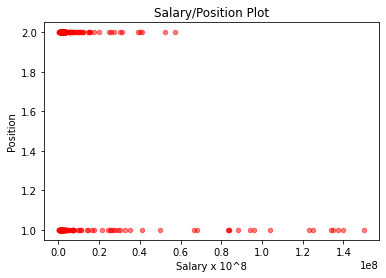

In [15]:
QBRBData.plot(kind = 'scatter',x = 'Salary', y = 'Position',alpha = 0.5, color = 'red')
plt.xlabel('Salary x 10^8')
plt.ylabel('Position')
plt.title('Salary/Position Plot')

In [16]:
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

[[ 3 37]
 [ 0 55]]


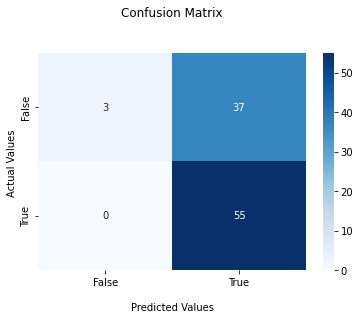

Accuracy: 0.6105263157894737
Precision: 1.0
Recall: 0.075


In [17]:
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))